## SUICIDE ANALYSIS

<img src="../images/picture.jpg">

## Brief Introduction

### _Who is at risk?_

While the link between suicide and mental disorders (in particular, depression and alcohol use disorders) is well established in high-income countries, many suicides happen impulsively in moments of crisis with a breakdown in the ability to deal with life stresses, such as financial problems, relationship break-up or chronic pain and illness.

In addition, experiencing conflict, disaster, violence, abuse, or loss and a sense of isolation are strongly associated with suicidal behaviour. Suicide rates are also high amongst vulnerable groups who experience discrimination, such as refugees and migrants; indigenous peoples; lesbian, gay, bisexual, transgender, intersex (LGBTI) persons; and prisoners. By far the strongest risk factor for suicide is a previous suicide attempt.

### _Data quality_

Globally, the availability and quality of data on suicide and suicide attempts is poor. Only 80 Member States have good-quality vital registration data that can be used directly to estimate suicide rates. This problem of poor-quality mortality data is not unique to suicide, but given the sensitivity of suicide – and the illegality of suicidal behaviour in some countries – it is likely that under-reporting and misclassification are greater problems for suicide than for most other causes of death.

Improved surveillance and monitoring of suicide and suicide attempts is required for effective suicide prevention strategies. Cross-national differences in the patterns of suicide, and changes in the rates, characteristics and methods of suicide, highlight the need for each country to improve the comprehensiveness, quality and timeliness of their suicide-related data. This includes vital registration of suicide, hospital-based registries of suicide attempts and nationally-representative surveys collecting information about self-reported suicide attempts.

This group is trying develop insights into the given data by using the datasets to answer some questions


    1. A)What is the % of male suicides in the total population per country every 5 years? (ratio of men that committed suicides in the total population of the country)?
       B)What is the % of female suicides in the total population per country every 5 years?
    >- Is there any correlation between the population and the suicide rates?
    >- Which countries had the highest % increase for each gender over the years?
    >- How did this percentage change over years in Europe?
    
    2.Find the year with the highest suicide rate of each:
        -         age group.
        -         Gender
      
    3. What can you deduce as a factor responsible for 2 above? E.g. famine, war, low gdp etc.
    
    4. What is the percentage of the age group in the population the year in 2 above
    
    5. Do you think population is a factor that influences suicide?
    
    6. Show the % increase in suicide across the decades for :
        -       each gender
        -         Age group
    7. Deduce reasons for answers in 6 above
    8. Could the ratio of the gender population each year be factor to consider? (like do we have more male suicides as a result of more women or more men in the population)
    9. Could the ratio of the age group also be a factor to consider?(are there more suicides amongst adult because there are more youths or because there are more adults in the population, is there any correlation)

In [1]:
import os
os.listdir('../data/')

['readme.md', 'who_suicide_statistics.csv']

In [172]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import style
import seaborn as sns

style.use('ggplot')
sns.set()

In [3]:
data = pd.read_csv('../data/who_suicide_statistics.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [9]:
data.loc[data['country'] == 'Albania']

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
367,Albania,2015,male,25-34 years,NaN,222680.0
368,Albania,2015,male,35-54 years,NaN,374464.0
369,Albania,2015,male,5-14 years,NaN,184114.0
370,Albania,2015,male,55-74 years,NaN,287770.0


trying to get the distribution of the sex in the population

In [240]:
per_country = pd.DataFrame(data[['country','sex', 'population']].groupby(['country','sex']).sum())

In [241]:
per_country

population
country                            sex                
Albania                            female   43474147.0
                                   male     43518565.0
Anguilla                           female          0.0
                                   male            0.0
Antigua and Barbuda                female    1072434.0
...                                                ...
Venezuela (Bolivarian Republic of) male    320602418.0
Virgin Islands (USA)               female    1018825.0
                                   male       941663.0
Zimbabwe                           female          0.0
                                   male            0.0

[282 rows x 1 columns]

In [239]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                     color="continent", # which column to use to set the color of markers
                     hover_name="country", # column added to hover information
                     size="pop", # size of markers
                     projection="natural earth")
fig.show()

### Task 6:  Show the percentage increase in the suicide rate for :
>1. Male
2. Female and,
3. each age group,
### across the decades

### 1. Approach, group by year and decade

In [14]:
min(data.year.unique()) , max(data.year.unique())
    

(1979, 2016)

> To know how many decades i will be working with

In [170]:
(2019-1970)/10

4.9

So five decades in all, here we go.

In [69]:
# To know how many unique entries

data.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982], dtype=int64)

### To make my work easier I created a list of lists, containing each decade as unique entries. So that i can create a dataframe for each decade

In [153]:
decades = [[] for i in range(6)]
for i in range(1,6):
    for x in data.year.unique():
           if x >=(1970+(i-1)*10) and x<(1970+(i*10)):
                decades[i].append(np.array(data[data.year==x]))

In [105]:
# import random
# c = [[] for i in range(5)]
# for i in range(1,5):
#     c[i].append(random.randint(1,20))
# decades[0]

[]

To create the dataframe, I initialising with the first year in each decade, but i created a function to add the remaining years

In [154]:
# Initialising the data decades
decade1 = pd.DataFrame(decades[1][0], columns=data.columns)
decade2 = pd.DataFrame(decades[2][0], columns=data.columns)
decade3 = pd.DataFrame(decades[3][0], columns=data.columns)
decade4 = pd.DataFrame(decades[4][0], columns=data.columns)
decade5 = pd.DataFrame(decades[5][0], columns=data.columns)

In [107]:
# the function
def add_more(data,x):
    '''
    Adds more data to the dataframe from the list of lists
    
    Args:
        data: the current dataframe.
        x   : the position of the decade in the list of lists
        
    Return:
        data: updated dataframe containing all the years in the 
              defined decade.
    
    '''
    for i in range(1,len(decades[x])):
        d = pd.DataFrame(decades[x][i], columns=data.columns)
        data = data.append(d)
    return(data)

In [155]:
decade1 = add_more(decade1,1)
decade2 = add_more(decade2,2)
decade3 = add_more(decade3,3)
decade4 = add_more(decade4,4)
decade5 = add_more(decade5,5)

In [156]:
# Checking the first decade for its unique entries, just 1979 as it should be
decade1.year.unique()

array([1979], dtype=object)

In [157]:
decade1.reset_index(inplace=True)

In [158]:
decade1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        672 non-null    int64 
 1   country      672 non-null    object
 2   year         672 non-null    object
 3   sex          672 non-null    object
 4   age          672 non-null    object
 5   suicides_no  444 non-null    object
 6   population   660 non-null    object
dtypes: int64(1), object(6)
memory usage: 36.9+ KB


### Gender 

In [159]:
decade1.groupby(['sex']).suicides_no.sum()


sex
female    29418.0
male      63372.0
Name: suicides_no, dtype: float64

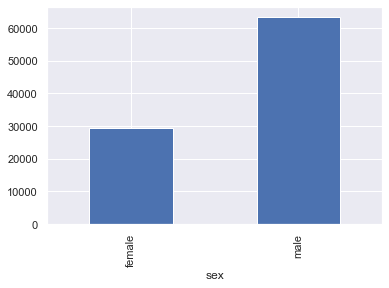

In [175]:
decade1.groupby(['sex']).suicides_no.sum().plot.bar()


In [125]:
decade1.groupby?


*Collating the suicides in each decade*

In [173]:
Suicide_1 = list(decade1.groupby(['sex']).suicides_no.sum())
Suicide_2 = list(decade2.groupby(['sex']).suicides_no.sum())
Suicide_3 = list(decade3.groupby(['sex']).suicides_no.sum())
Suicide_4 = list(decade4.groupby(['sex']).suicides_no.sum())
Suicide_5 = list(decade5.groupby(['sex']).suicides_no.sum())

In [176]:
# position 0 implies female, while position 1 represents male category
Suicide_1

[29418.0, 63372.0]

In [177]:
Suicide_ = [Suicide_1,Suicide_2,Suicide_3,Suicide_4,Suicide_5]

>But Suicide Rate is defined by WHO is the number of suicides per 100,000 

>So we divide by 100,000

In [181]:
# separating the data for both genders while also calculating the rate

Suicide_male = [Suicide_[i][1]/100000 for i in range(len(Suicide_))]
Suicide_female = [Suicide_[i][0]/100000 for i in range(len(Suicide_))]


In [182]:
Suicide_male

[0.63372, 12.45888, 18.08655, 19.31481, 10.74787]

In [183]:
Suicide_female

[0.29418, 4.56005, 5.44432, 5.49299, 3.23118]

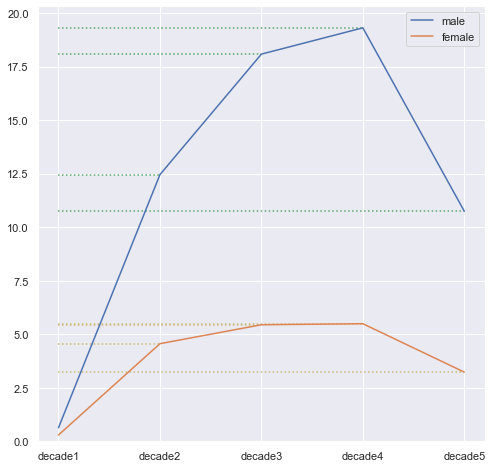

In [204]:
plt.figure(figsize=(8,8))
plt.plot(Suicide_male)
plt.plot(Suicide_female)
plt.xticks(range(0,5),['decade1', 'decade2', 'decade3', 'decade4', 'decade5'])
plt.legend(['male', 'female'], loc =(1))
plt.ylim(0, max(Suicide_male)+1)
plt.hlines(Suicide_male,0, [range(0,5)], color='g', linestyle= 'dotted')
plt.hlines(Suicide_female,0, [range(0,5)], color='y', linestyle= 'dotted')

## We can see from the graph that the 4th decade has the highest suicide rate.

We can also observe a significant jump in the sucide rate across the previous decades.
Few reasons why I think the suicide increased.
>1. The majority of suicides could be as a result of old veterans of the world war.
2. The 3rd and 4th industrial revolutions happened quite rapidly from the 1960's, leading to job loss even at increased population, you can read more __[here](https://ied.eu/project-updates/the-4-industrial-revolutions/)__. So unemployment could be a reason too.
3. There were a lot of civil wars in the 1970's and 1980's, so this can also be a factor to consider.
4. There were serious pandemics too in those decades

### Age group

In [217]:
suicide_1 = list(decade1.groupby('age').suicides_no.sum())
suicide_2 = list(decade2.groupby('age').suicides_no.sum())
suicide_3 = list(decade3.groupby('age').suicides_no.sum())
suicide_4 = list(decade4.groupby('age').suicides_no.sum())
suicide_5 = list(decade5.groupby('age').suicides_no.sum())

In [221]:
suicide_ = [suicide_1,suicide_2,suicide_3,suicide_4,suicide_5]

### creating a list for each of the age groups containing values across the decades

In [222]:
age_5_14 = [suicide_[i][3]/100000 for i in range(len(suicide_))]
age_15_24 = [suicide_[i][0]/100000 for i in range(len(suicide_))]
age_25_34 = [suicide_[i][1]/100000 for i in range(len(suicide_))]
age_35_54 = [suicide_[i][2]/100000 for i in range(len(suicide_))]
age_55_74 = [suicide_[i][4]/100000 for i in range(len(suicide_))]
age_75_ = [suicide_[i][5]/100000 for i in range(len(suicide_))]

In [224]:
ages = [age_5_14, age_15_24,age_25_34, age_35_54, age_55_74, age_75_]

(0.0, 10.37256)

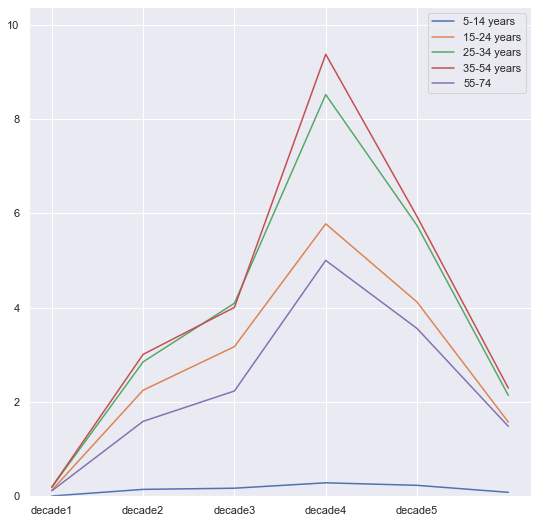

In [228]:
plt.figure(figsize=(9,9))
plt.plot(ages)
plt.xticks(range(0,5),['decade1', 'decade2', 'decade3', 'decade4', 'decade5'])
plt.legend(['5-14 years','15-24 years','25-34 years', '35-54 years', '55-74', '75+'] , loc =(0))
plt.ylim(0, max(age_35_54)+1)